<img style="float: left;" src="Lecture_flow1/Slide1.PNG" width="100%">

<img style="float: left;" src="Lecture_flow1/Slide2.PNG" width="100%">

<img style="float: left;" src="Lecture_flow1/Slide3.PNG" width="100%">

<img style="float: left;" src="Lecture_flow1/Slide4.PNG" width="100%">

<img style="float: left;" src="Lecture_flow1/Slide5.PNG" width="100%">

<img style="float: left;" src="Lecture_flow1/Slide6.PNG" width="100%">

<img style="float: left;" src="Lecture_flow1/Slide7.PNG" width="100%">

<img style="float: left;" src="Lecture_flow1/Slide8.PNG" width="100%">

In [1]:
def props(component, params):
    properties = [["C1",    "CO2",   "N2",    "H2S",   "C2",    "C3",   "H2"],      # component
                  [190.58,  304.10,  126.20,  373.53,  305.32,  369.8,  33.25],     # T_c [K]
                  [46.04,   73.75,   34.00,   89.63,   48.72,   42.45,  12.97],     # p_c [bar]
                  [0.012,   0.239,   0.0377,  0.0942,  0.0995,  0.1524, -0.220],    # acentric factor [-]
                  [16.043,  44.01,   28.013,  34.076,  30.07,   44.097, 2.01594],   # molecular mass [g/mol]
                  [0.28473, 0.27408, 0.29115, 0.28195, 0.28463, 0.27616, 0.304]]    # critical compressibility factors
    
    name = ["Tc", "Pc", "ac", "Mw", "Zc"]
    index1 = name.index(params) + 1
    index2 = properties[0][:].index(component)
    c = properties[index1][index2]

    return c


def binary(component, components):
    # binary interaction parameters for CH4, CO2 ...    
    # from Aspen plus (DOI 10.1016/j.fluid.2016.06.012)
    dij = [["CO2",    "C1",    "N2",    "H2S",    "C2", "C3",  "H2"],  
           [ 0,       0.100,  -0.017,   0.0974,   0.1,  0.1,   0.1 ],
           [ 0.100,   0,       0.0311,  0.0503,   0,     0,    0.1 ],
           [-0.017,   0.0311,  0,       0.1767,   0.1,   0.1,  0.01],
           [ 0.0974,  0.0503,  0.1767,  0,        0.05,  0.05, 0.1 ],
           [ 0.1,     0,       0.1,     0.05,     0,     0,    0.1 ],
           [ 0.1,     0,       0.1,     0.05,     0,     0,    0.1 ],
           [ 0.1,   0.1,       0.01,    0.1,      0.1,   0.1,  0   ]]  

    d = []
    index1 = dij[0].index(component) + 1
    for c in components:
        index2 = dij[0].index(c)
        d.append(dij[index1][index2])
        
    return d

In [2]:
def vapour_compress(p, T, x, components):
    # Peng-Robinson EoS
    NC = np.size(x)
    R = 8.3145E-5

    b = 0
    ai = np.zeros(NC)
    for i in range(0, np.size(ai)):
        Tc = props(components[i], "Tc")
        Pc = props(components[i], "Pc")
        ac = props(components[i], "ac")
        m = 0.37464 + 1.54226 * ac - 0.26992 * ac**2
        alpha = (1 + m * (1 - np.sqrt(T / Tc)))**2
        ai[i] = 0.45724 * R**2 * Tc**2 * alpha / Pc
        b += 0.0778 * R * Tc / Pc * x[i]

    a = 0
    for i in range(0, NC):
        d = binary(components[i], components)
        for j in range(0, NC):            
            aij = np.sqrt(ai[i] * ai[j]) * (1-d[j])
            a += aij * x[i] * x[j]

    A = a * p / (R**2 * T**2)
    B = b * p / (R * T)

    # solve for compressibility Z
    Z = np.roots([1, -(1-B), A-3*B**2-2*B, -(A*B-B**2-B**3)])  

    # if 3 real roots, take max
    if np.sum(np.imag(Z) == 0) == 1:
        index = np.nonzero(np.imag(Z) == 0)  # find real root
        Z_out = np.real(Z[index])   # Z reduces to only the real root
        phi_c = np.zeros(NC)
    else:
        Z_out = np.amax(Z)

    return Z_out

## <span style="color:red">Exercise 1:  Compressibility graph</span>

#### Plot graph of compressibility Z vs. normal pressure for:
 * Pure methane
 * Mixture of methane (85%), ethane (10%) and carbon dioxide (5%)
  #### at 3 temperatures T = 30, 60 and 90 C

C:\Users\HSpaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


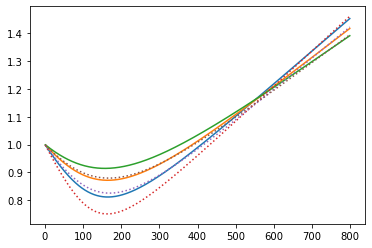

In [3]:
import numpy as np
import matplotlib.pyplot as plt

comp = ['C1']
y = [1.0]

t_conv = 273 # kelvin
t_list = [30 + t_conv, 60 + t_conv, 90 + t_conv]

for t in t_list:
    zz = []
    pp = []

    for p in range(1, 800):
        z = vapour_compress(p, t, y, comp)
        pp.append(p)
        zz.append(z)
        
    plt.plot(pp, zz)

### your code here ###

comp = ['C1', 'C2', 'CO2']
y = [0.85, 0.1, 0.05]

for t in t_list:
    zz = []
    pp = []

    for p in range(1, 800):
        z = vapour_compress(p, t, y, comp)
        pp.append(p)
        zz.append(z)
        
    plt.plot(pp, zz, linestyle=':')


<img style="float: left;" src="Lecture_flow1/Slide10.PNG" width="100%">

## <span style="color:red">Exercise 2: Compute pressure changes</span>

#### Consider gas production from reservoir contained mixture from Exercise 1:
 * Depth of reservoir: 2000 m
 * Area of reservoir: 1 by 3 km 
 * Tickness of reservoir: 100 m
 * Initial pressure: 200 bars
 * Porosity: 20%
 * Rock compressibility: $10^{-5}$ 1/bar
 * Yearly gas demand: 300 Mm$^3$
 
#### Compute pressure in the reservoir after 10 years of production

In [4]:
rock_compr = 1e-5

def calculate_rho_gas(p, temp, comp, y):
    R = 8.1345e-1 # J/K/mol
    M = 0
    for i in range(len(comp)):
        M += props(comp[i], 'Mw') * y[i]
    Z = vapour_compress(p, temp, y, comp)
    rho_gas = M * p / (Z * R * temp)
    return rho_gas
   
def calculate_poro(p):
    phi_ref = 0.2
    pref = 1
    phi = phi_ref * (1 + rock_compr * (p - pref))
    return phi

def calculate_dphi_drho(p, t, comp, y):
    h = 1e-4
    dphi_drho = ((calculate_poro(p+h) * calculate_rho_gas(p+h, t, comp, y)) - (calculate_poro(p) * calculate_rho_gas(p, t, comp, y))) / h
                
    return dphi_drho    

[145.02663269]


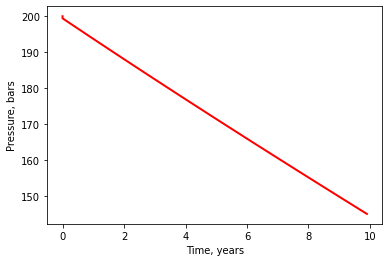

In [5]:
depth = 2000
p_0 = 200 # bar
temp_sc = 288

comp = ['C1']
y = [1.0]

temp = temp_sc + 60

X = 3000
Y = 1000
h = 100

volume = X*Y*h
gas_extracted_surf = 300e6 # que putas???

year = 0
p_vec = [p_0]
t_vec = [0]
p = p_0

dt = 0.1

gas_extracted_mass = dt * gas_extracted_surf * calculate_rho_gas(1, temp_sc, comp, y)

for year in np.arange(0, 10, dt):

    ### Your code here ###
    dphi_drho = calculate_dphi_drho(p, temp, comp, y)
    pn = p - gas_extracted_mass / volume / dphi_drho
    
    t_vec.append(year)
    p_vec.append(pn)
    p = pn
    
print(p)

plt.plot(t_vec, p_vec, 'red', linewidth=2)
plt.xlabel('Time, years')
plt.ylabel('Pressure, bars')
plt.show()

<img style="float: left;" src="Lecture_flow1/Slide12.PNG" width="100%">

<img style="float: left;" src="Lecture_flow1/Slide14.PNG" width="100%">

## <span style="color:red">Exercise 3: Compute pressure and gas saturation </span>

#### Consider CO2 injection to water reservoir
 * Depth of reservoir: 1500 m
 * Area of reservoir: 4 by 4 km 
 * Tickness of reservoir: 200 m
 * Initial pressure: 150 bars
 * Porosity: 20%
 * Rock compressibility: $10^{-5}$ 1/bar
 * Yearly CO2 rate: 100 Mm$^3$
 * Average uplift limit: 20 cm
 
#### Compute lifetime of the storage project

In [6]:
water_compr = 1e-5 # 1/bars

def calculate_rho_water(p):   # I input 6
    rhow_0 = 1000/18 # molar density of water at sc
    p0 = 1
    pho_water = ((p-p0)*rhow_0)*water_compr
    return pho_water

def calculate_dphi_drho_w(p):     # I input 11
    h = 1e-4
    dphi_drho = ((calculate_poro(p+h) * calculate_rho_water(p+h)) - (calculate_poro(p) * calculate_rho_water(p))) / h
    return dphi_drho

def calculate_dphi_drho_g(p, t, comp, y): # I input line 16
    h = 1e-4
    dphi_drho = ((calculate_poro(p+h) * calculate_rho_gas(p+h, t, comp, y)) - (calculate_poro(p) * calculate_rho_gas(p, t, comp, y))) / h
    return dphi_drho

In [ ]:
import numpy as np

therm_grad = 0.04 # own input degree/m
depth = 1500
temp_sc = 288
p_0 = 150

comp = ['CO2']
y = [1.0]

temp = temp_sc + therm_grad*depth # I added therm_grad

X = 4000
Y = 4000
h = 200

volume = X*Y*h
gas_extracted_surf = 100e6

year = 0
p_vec = [p_0]
t_vec = [0]
s_vec = [0]
p = p_0
s = 0

dt = 0.1

uplift = 0.0

gas_mass = # maybe: gas_extracted_surf * calculate_rho_gas(1, temp_sc, comp, y) 

while uplift < 0.2:    
    dphi_drho = calculate_dphi_drho_g(p, temp, comp, y) # I added this one
    pn = # fill this in maybe: p - gas_extracted_mass / volume / dphi_drho

    sn = 
        
    year += dt
    t_vec.append(year)
    p_vec.append(pn)
    s_vec.append(sn)
    
    p = pn
    s = sn
    
print(p)
print(year)

import matplotlib.pyplot as plt

plt.figure(num=2, figsize=(12,4))
plt.subplot(121)
plt.plot(t_vec, p_vec, 'red', linewidth=2)
plt.xlabel('Time, years')
plt.ylabel('Pressure, bars')
plt.subplot(122)
plt.plot(t_vec, s_vec, 'red', linewidth=2)
plt.xlabel('Time, years')
plt.ylabel('Saturation')

plt.show()

<img style="float: left;" src="Lecture_flow1/Slide15.PNG" width="100%">

<img style="float: left;" src="Lecture_flow1/Slide16.PNG" width="100%">